# Dataset acquisition

In [1]:
!powershell Get-Content "data/train.csv" -Head 3

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C


In [2]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

display(train_df.head())
display(train_df.info())
display(test_df.head())
display(test_df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

**Findings**:  
- Missing values :  
    - train : Age (177/891), Cabin (687/891), Embarqued(2/891) for train dataset  
    - test dataset : no missing values for test dataset
- Categorical features : Survived, Pclass, Sex, SibSp, Embarked
- Numerical Features : Age, SibSp, Parch, Fare
- Text Feature: Name

# Feature engineering

## Pclass, Sex, Age, Embarked, Siblings and Parent/children features

<IPython.core.display.Javascript object>


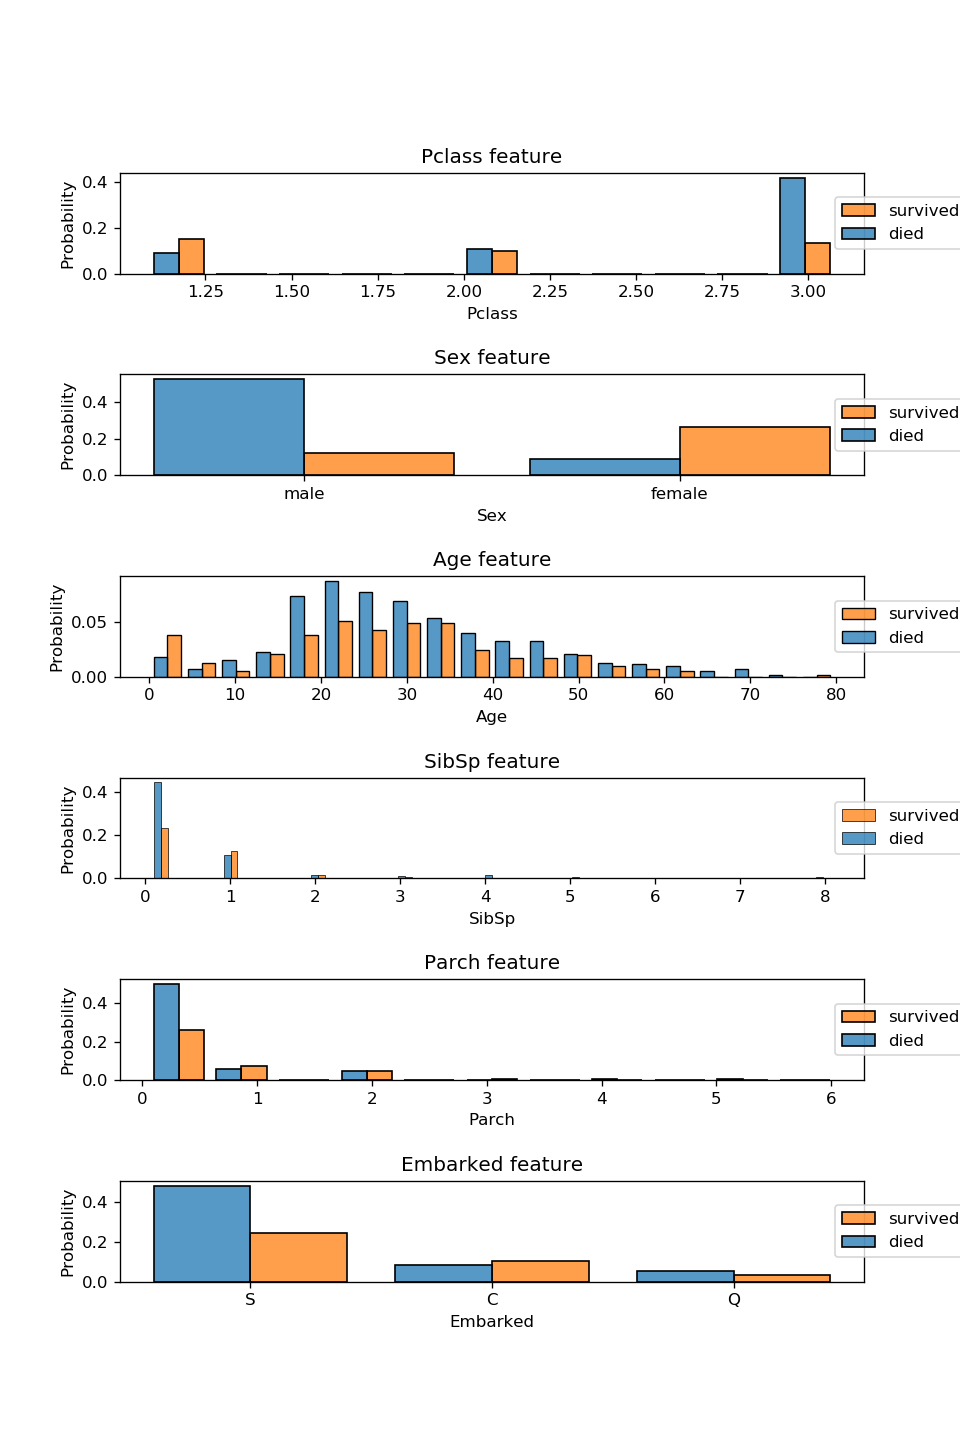

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]
fig, axes = plt.subplots(len(features), 1, figsize=(8,12))

for ax, column in zip( axes, features):
    sns.histplot(data=train_df.loc[:,["Survived", column]].dropna(), 
                 x=column, 
                 hue="Survived", 
                 multiple="dodge", 
                 shrink=.8, 
                 stat= "probability", 
                 kde=False,#(column == "Age"),
                 ax=ax)
    ax.set_title(f"{column} feature")
    # put legend aside
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.4, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', labels=["survived", "died"], bbox_to_anchor=(0.95, 0.5))
plt.subplots_adjust(hspace = 1)



### Findings

#### Pclass
Among the first class passengers, there is clearly a larger proportion of survivals.  
No strong tendency among second class passengers.  
A high majority of third class passengers did not survive
=> **Pclass promoted as a feature**

#### Sex
Very strong disparity of survival between male and female passengers     
Conversely to males, females majoritarily survived     
=> **Sex promoted as a feature**

#### Age
Distributions of survivals and death regarding the age are notably different:    
<8y : very young passengers mostly survived  
16 - 45y : at this age, majority of passengers did not survive      
50 - 60y : proportion of survival/death seems rather balanced    
\>60Y : passengers mostly died  
=> **Age promoted as a feature**  
=> we nearly found pattern in the age categories, **it may be tempting to discretize this feature** 

#### SibSP, Parch
These two features show exactly the same pattern:   
mortality rate drops as soon as passenger have family bonds on the ship  
**=> SibSp and Parch will be merged as a single binary "has family bond" feature**

#### Embarked
Clearly a strong survival rate among passengers having embarqued at Southampton.  
But this might be explained by a disproportion of the class embarking at the different harbours.  
Will analyse this potential feature together with the ticket class.  

#### Conclusion:  
"women and children first + elderly" might have prevailed in the repartition of life boats**

## Embarked and Fare features

<IPython.core.display.Javascript object>


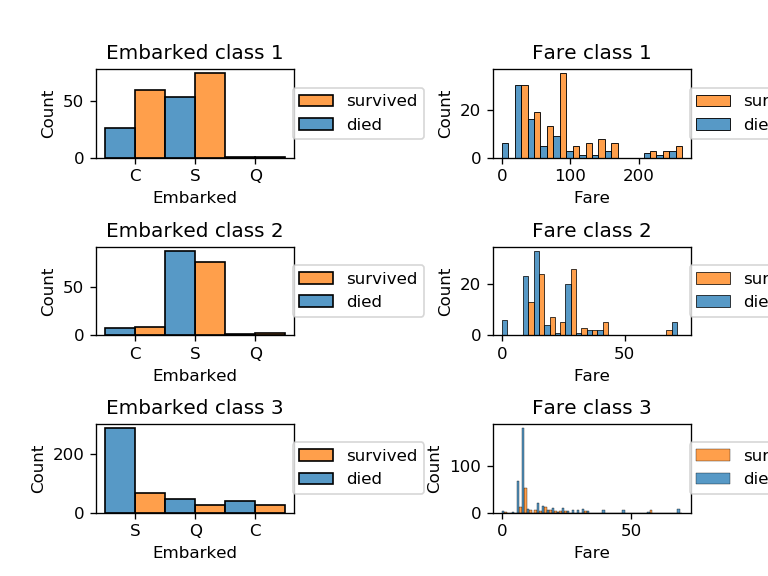

In [12]:
pclasses = [1,2,3]
fig, axes = plt.subplots(3, 2)

for feature, column in zip(["Embarked", "Fare"], [0,1]):
    for pclass, ax in zip(pclasses, axes[:, column]):
        data = train_df[train_df["Pclass"]==pclass].loc[:,["Survived", feature]].dropna()
        if feature == "Fare":
            data = data[data.Fare < 300]
        sns.histplot(
            data=data, 
            x=feature, 
            hue="Survived", 
            multiple="dodge",
            ax=ax,
            legend=True)
        ax.set_title(f"{feature} class {pclass}")
        # put legend aside
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.4, box.height])

        # Put a legend to the right of the current axis
        ax.legend(loc='center left', labels=["survived", "died"], bbox_to_anchor=(0.95, 0.5))
plt.subplots_adjust(hspace=1, wspace=1)

### Findings:

#### Embarked:
We observe notably different survival rates for class 3 passengers: most Southampton class 3 passengers did not survive  
**=> Embarked promoted as a feature**

#### Fare:
We can see that higher is the Fare, higher is the chance to survive, especially among first class  
**=> Fare promoted as a feature**

## Cabin feature

Let's find out if the cabin gives useful information on the deck emplacement

In [5]:
train_df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<IPython.core.display.Javascript object>


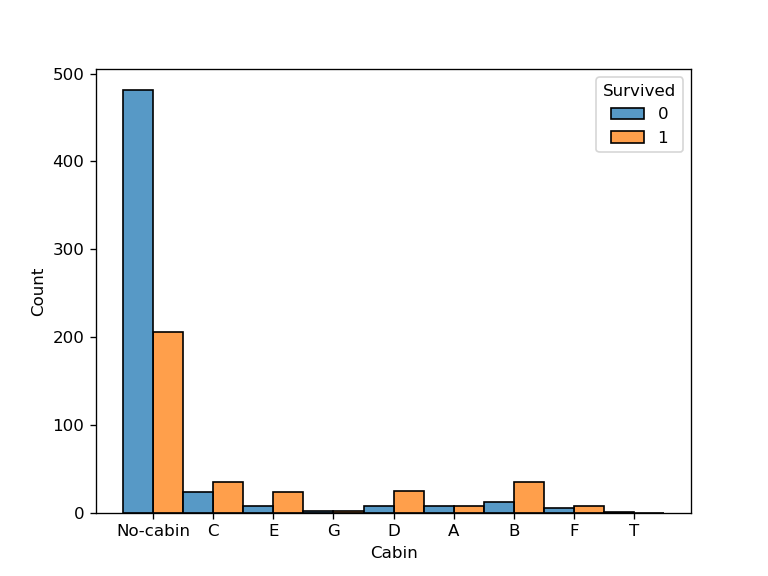

In [13]:
deck = train_df["Cabin"].str[:1].fillna("No-cabin")
deck = pd.concat([train_df.Survived, deck], axis=1)

fig,ax = plt.subplots()
sns.histplot(data = deck, hue="Survived", x="Cabin", multiple="dodge")

### Findings:

No clear pattern of particular survival rate regarding the cabin deck.  
We will rather drop this feature.

## Name, Ticket Feature

Let's find out if we get useful info from the passengers titles.  
First, let's display many rows to extract the most common titles.  
Then, refine this list by ignoring common titles and zooming on other names

In [7]:

pd.options.display.max_rows = 100
pd.set_option('max_colwidth', 300)
train_df.Name[:100]

0                                       Braund, Mr. Owen Harris
1           Cumings, Mrs. John Bradley (Florence Briggs Thayer)
2                                        Heikkinen, Miss. Laina
3                  Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                      Allen, Mr. William Henry
5                                              Moran, Mr. James
6                                       McCarthy, Mr. Timothy J
7                                Palsson, Master. Gosta Leonard
8             Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                           Nasser, Mrs. Nicholas (Adele Achem)
10                              Sandstrom, Miss. Marguerite Rut
11                                     Bonnell, Miss. Elizabeth
12                               Saundercock, Mr. William Henry
13                                  Andersson, Mr. Anders Johan
14                         Vestrom, Miss. Hulda Amanda Adolfina
15                             Hewlett, 

In [8]:
titles_pattern = r'Mr\.|Mrs\.|Miss\.|Master\.|Dr\.|Rev\.'

# train_df me.str.extract(r'(Mr\.|Mrs\.|Miss.)')
train_df[- train_df.Name.str.contains(titles_pattern)].Name

30                                              Uruchurtu, Don. Manuel E
369                                        Aubart, Mme. Leontine Pauline
443                                            Reynaldo, Ms. Encarnacion
449                                       Peuchen, Major. Arthur Godfrey
536                                    Butt, Major. Archibald Willingham
556    Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")
599                         Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
641                                                 Sagesser, Mlle. Emma
647                                  Simonius-Blumer, Col. Oberst Alfons
694                                                      Weir, Col. John
710                     Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")
745                                         Crosby, Capt. Edward Gifford
759             Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)
822                                      Reuchlin, 

In [9]:
import re

def replace_title(s):
    mrs_pattern = "(Mme\.|Ms\.|Countess\.|Lady\.)"
    miss_pattern = "(Mlle\.)"
    mr_pattern = "(Don\.|Major\.|Sir\.|Col\.|Capt\.)"
    if re.search(mrs_pattern, s):
        return re.sub(mrs_pattern, "Mrs.", s)
    if re.search(miss_pattern, s):
        return re.sub(miss_pattern, "Miss.", s)
    if re.search(mr_pattern, s):
        return re.sub(mr_pattern, "Mr.", s)
    return s

def extract_titles(df):
    titles_extract_pattern = r'(?P<Name>Mr\.|Mrs\.|Miss\.|Master\.|Dr\.|Rev\.)'
    df["Title"] = (df.Name
               .transform(replace_title)
               .str
               .extract(titles_extract_pattern)
               .fillna("No-Title.")
              ) ## in case we find other Name patterns in the test set
    return df

extract_titles(train_df)["Title"].unique()


array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Rev.', 'Dr.', 'No-Title.'],
      dtype=object)

<IPython.core.display.Javascript object>


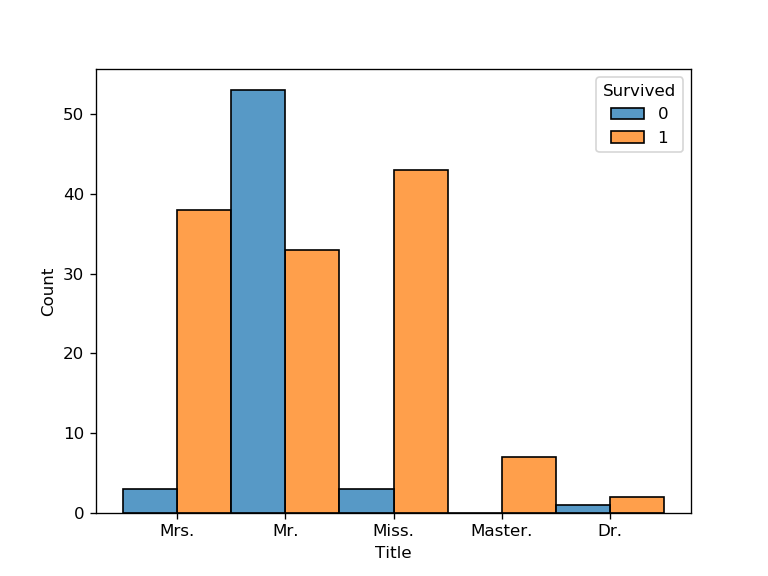

In [16]:
fig, ax = plt.subplots()
sns.histplot(data=extract_titles(train_df).dropna(), hue="Survived", x="Title", ax=ax, multiple="dodge")

### Findings:  
This feature looks very correlated to the sex feature, but may well be complementary especially for the male passengers.  
**=> Name will be engineered as a Title feature**

# Data preprocessing



## Missing values:  
**Embarked**: very few missing values in the train dataset (2/891)  
=> we'll replace missing values by the Harbour where most of the passengers embarked, that is Southampton 


In [17]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Age** : Age seems to be a predominant feature, along with Pclass, Sex  
Nearly 20% of Age data are missing.  
Let's deduce Age from Pclass and Sex features by regression. 

## feature creation:  

**Title**:
We will apply what we found earlier and create the binary "Title" feature from Parch and SibSp

**Accompanied**
Let's create Accompanied from SibSp and Parch as see above.


In [20]:
train_df.drop("Title", inplace=True, axis =1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def extract_accompanied_feature(arr):
    return (
        np.where(arr.sum(axis=1) >=1, 1, 0)
        .reshape(-1, 1)
    )

preprocess = Pipeline([
    
    # extracting title from Name
    ("title", FunctionTransformer(extract_titles)),
    
    # Will need Pclass and Sex Features in order to regress Age missing values
    # encode them first
    ("encode_class_sex", ColumnTransformer([
        # keep only useful features, that is dropping Survived, PassengerId, Ticket, Cabin
        ("passthrough", "passthrough", ["Title", "SibSp", "Parch", "Fare", "Embarked","Age"]),
        # encode Pclass and Sex
        ("encode_class_sex", OneHotEncoder(handle_unknown = "ignore"), ["Pclass", "Sex"])
    ], n_jobs=-1)),
    
    #new column order : "Title", "SibSp", "Parch", "Fare", "Embarked","Age", "Pclass", "Sex"
    
    
    ("union", ColumnTransformer([
        
        # keep Title       
        ("passthrough", "passthrough", [0]),
        
        #creating binary feature from SibSp and Parch
        ("accompanied" , FunctionTransformer(extract_accompanied_feature), [1,2] ),
        
        # handling missing NA values for Embarked feature (col 4) with 'most-frequent' values
        # Note: SimpleImputer only works with 2D arrays, so workaround by adding Fare (col 3)
        ("embarked", SimpleImputer(strategy='most_frequent'), [3, 4]),
        
        # Age (col 5): will be regressed from Pclass and Sex features col[6:]
        ("age", IterativeImputer(),  list( range(5,11)) )
        

    ], n_jobs=-1)),
    #new column order : "Title", "Accompanied", "Fare", "Embarked","Age", "Pclass", "Sex"
    
    ("norm_and_encode", ColumnTransformer([

        ("norm", StandardScaler(), [2, 4]),
        
        # only Title and Accompanied are not yet encoded
        ("encode" , OneHotEncoder(handle_unknown = "ignore"), [0, 1, 3] ),
        
        ("passthrough", "passthrough",  list(range(5,10)) ),
        
    ], n_jobs=-1))
])

train = preprocess.fit_transform(train_df)
print("displaying first line of X_train to check the postprocessing results ...")
print(train[0,:])



displaying first line of X_train to check the postprocessing results ...
[-0.5024451714361923 -0.5527484858466684 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0]


# Model Selection

## Let's see what we get from basic model ...

In [150]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate

X_train, y_train = train_df.drop("Survived", axis=1), train_df["Survived"]
basic_estimator = make_pipeline(preprocess, LinearSVC())
scoring=["accuracy", "precision", "recall", "f1", "roc_auc"]

cv_results = cross_validate(basic_estimator, X_train, y_train, n_jobs=-1, cv=5, scoring=scoring)
display(cv_results)
print(cv_results["test_accuracy"].mean())
print(cv_results["test_roc_auc"].mean())

{'fit_time': array([0.26628804, 0.26469707, 0.24335003, 0.266289  , 0.25631309]),
 'score_time': array([0.13164854, 0.13523531, 0.14361477, 0.13463712, 0.13747883]),
 'test_accuracy': array([0.78212291, 0.8258427 , 0.80337079, 0.76404494, 0.83146067]),
 'test_precision': array([0.69736842, 0.7761194 , 0.75384615, 0.72413793, 0.8       ]),
 'test_recall': array([0.76811594, 0.76470588, 0.72058824, 0.61764706, 0.75362319]),
 'test_f1': array([0.73103448, 0.77037037, 0.73684211, 0.66666667, 0.7761194 ]),
 'test_roc_auc': array([0.86060606, 0.84385027, 0.86397059, 0.82627005, 0.8952267 ])}

0.8013684012303057
0.8579847336548573


## Test a few models , still without hyperparameter tuning ...

In [151]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

svm = make_pipeline(preprocess, SVC(kernel='sigmoid'))
print("with SVM kernel=sigmoid")
display(cross_validate(svm, X_train, y_train, n_jobs=-1, cv=5, scoring=scoring))

rf = make_pipeline(preprocess, RandomForestClassifier(n_jobs=-1))
print("with Random Forest")
display(cross_validate(rf, X_train, y_train, n_jobs=-1, cv=5, scoring=scoring))

gb = make_pipeline(preprocess, GradientBoostingClassifier())
print("with GradientBoosting")
display(cross_validate(gb, X_train, y_train, n_jobs=-1, cv=5, scoring=scoring))

mlp = make_pipeline(preprocess, MLPClassifier(activation='tanh'))
print("with ML perceptron")
display(cross_validate(mlp, X_train, y_train, n_jobs=-1, cv=5, scoring=scoring))

ensemble = VotingClassifier(
    [("rf", rf),("gb", gb),("mlp", mlp)], voting='soft', n_jobs=-1)

print("with soft voting between random forest, gradient boosting, mlp")
cv_results = cross_validate(ensemble, X_train, y_train, n_jobs=-1, cv=5, scoring=scoring)
display(cv_results)
print(cv_results["test_accuracy"].mean())
print(cv_results["test_roc_auc"].mean())

with SVM kernel=sigmoid


{'fit_time': array([0.15858054, 0.1595757 , 0.1629951 , 0.1695447 , 0.15857649]),
 'score_time': array([0.14257836, 0.13859797, 0.14218736, 0.14066434, 0.14565182]),
 'test_accuracy': array([0.68156425, 0.75280899, 0.70786517, 0.67977528, 0.78089888]),
 'test_precision': array([0.56382979, 0.66666667, 0.6       , 0.57333333, 0.72058824]),
 'test_recall': array([0.76811594, 0.70588235, 0.70588235, 0.63235294, 0.71014493]),
 'test_f1': array([0.65030675, 0.68571429, 0.64864865, 0.6013986 , 0.71532847]),
 'test_roc_auc': array([0.70671937, 0.72954545, 0.76169786, 0.74953209, 0.80893498])}

with Random Forest


{'fit_time': array([0.657197  , 0.65320659, 0.65221667, 0.65524721, 0.65396476]),
 'score_time': array([0.25930548, 0.25531721, 0.24733758, 0.24933386, 0.24733782]),
 'test_accuracy': array([0.78212291, 0.79213483, 0.85393258, 0.7752809 , 0.79213483]),
 'test_precision': array([0.72727273, 0.73134328, 0.8       , 0.75      , 0.72222222]),
 'test_recall': array([0.69565217, 0.72058824, 0.82352941, 0.61764706, 0.75362319]),
 'test_f1': array([0.71111111, 0.72592593, 0.8115942 , 0.67741935, 0.73758865]),
 'test_roc_auc': array([0.85013175, 0.81530749, 0.90080214, 0.85220588, 0.88086691])}

with GradientBoosting


{'fit_time': array([0.44681048, 0.45079613, 0.46076846, 0.46974659, 0.4677999 ]),
 'score_time': array([0.13067818, 0.13563514, 0.14162183, 0.13767505, 0.13264036]),
 'test_accuracy': array([0.82681564, 0.80898876, 0.85393258, 0.79775281, 0.85955056]),
 'test_precision': array([0.796875  , 0.78333333, 0.85      , 0.82      , 0.83333333]),
 'test_recall': array([0.73913043, 0.69117647, 0.75      , 0.60294118, 0.79710145]),
 'test_f1': array([0.76691729, 0.734375  , 0.796875  , 0.69491525, 0.81481481]),
 'test_roc_auc': array([0.86620553, 0.81423797, 0.88516043, 0.8644385 , 0.90938705])}

with ML perceptron


{'fit_time': array([1.77126265, 1.76827121, 1.74832463, 1.85802722, 1.74234009]),
 'score_time': array([0.13663459, 0.13567495, 0.13264728, 0.1297133 , 0.13068318]),
 'test_accuracy': array([0.7877095 , 0.79213483, 0.83146067, 0.80337079, 0.84269663]),
 'test_precision': array([0.78181818, 0.75409836, 0.82758621, 0.82352941, 0.82539683]),
 'test_recall': array([0.62318841, 0.67647059, 0.70588235, 0.61764706, 0.75362319]),
 'test_f1': array([0.69354839, 0.71317829, 0.76190476, 0.70588235, 0.78787879]),
 'test_roc_auc': array([0.86073781, 0.84291444, 0.87052139, 0.82934492, 0.90386917])}

with soft voting between random forest, gradient boosting, mlp


{'fit_time': array([2.76357174, 2.72068191, 2.79448462, 2.71168923, 2.8453877 ]),
 'score_time': array([0.52858782, 0.52861357, 0.52463627, 0.51462364, 0.50469589]),
 'test_accuracy': array([0.82681564, 0.82022472, 0.85393258, 0.80898876, 0.85955056]),
 'test_precision': array([0.80645161, 0.79032258, 0.85      , 0.84      , 0.84375   ]),
 'test_recall': array([0.72463768, 0.72058824, 0.75      , 0.61764706, 0.7826087 ]),
 'test_f1': array([0.76335878, 0.75384615, 0.796875  , 0.71186441, 0.81203008]),
 'test_roc_auc': array([0.86903821, 0.82807487, 0.89913102, 0.86584225, 0.91490493])}

0.8339024543343168
0.8753982538731124


## Hyperparameter tuning

In [ ]:
# print(rf.get_params().keys())

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

params = {
    'randomforestclassifier__max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'randomforestclassifier__max_depth' : [None] + list(np.arange(3,10))
}

def print_metrics(gs):
    print("best mean accuracy")
    print(gs.cv_results_["mean_test_accuracy"][gs.best_index_])
    print("best mean precision")
    print(gs.cv_results_["mean_test_precision"][gs.best_index_])
    print("best mean recall")
    print(gs.cv_results_["mean_test_recall"][gs.best_index_])
    print("best mean f1")
    print(gs.cv_results_["mean_test_f1"][gs.best_index_])
    print("best mean roc auc")
    print(gs.cv_results_["mean_test_roc_auc"][gs.best_index_])

    
gs = GridSearchCV(
    estimator = rf,
    cv=5,
    n_jobs=-1,  
    verbose=2, 
    refit='accuracy', 
    param_grid = params, 
    scoring = scoring)

gs.fit(X_train, y_train)
print(gs.best_params_)
best_rf = gs.best_estimator_
print_metrics(gs)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   31.4s finished


{'randomforestclassifier__max_depth': 7, 'randomforestclassifier__max_features': 1.0}
best mean accuracy
0.8440148138848785
best mean precision
0.835071070778038
best mean recall
0.7395993179880647
best mean f1
0.7838701786872825
best mean roc auc
0.8736879766955555


In [135]:
# print(gb.get_params().keys())

In [134]:
params = {
    'gradientboostingclassifier__learning_rate': [0.001, 0.03, 0.1, 0.3],
    'gradientboostingclassifier__max_depth' : list(np.arange(3,10))
}

    
gs = GridSearchCV(
    estimator = gb,
    cv=5,
    n_jobs=-1,  
    verbose=2, 
    refit='accuracy', 
    param_grid = params, 
    scoring = scoring)

gs.fit(X_train, y_train)
print(gs.best_params_)
best_gb = gs.best_estimator_
print_metrics(gs)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   29.4s finished


{'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 4}
best mean accuracy
0.8350260498399347
best mean precision
0.8196885582591245
best mean recall
0.7308184143222506
best mean f1
0.7711592558341784
best mean roc auc
0.8716983089061857


In [142]:
params = {
    'mlpclassifier__solver': ['lbfgs', 'adam', 'sgd'],
    'mlpclassifier__hidden_layer_sizes' : [(100,),(50,50),(50,50,50)],
    'mlpclassifier__alpha' : [0.0001, 0.0003, 0.001, 0.003, 0.01],
    'mlpclassifier__activation' : ['logistic', 'tanh']
}

    
gs = GridSearchCV(
    estimator = mlp,
    cv=5,
    n_jobs=-1,  
    verbose=2, 
    refit='accuracy', 
    param_grid = params, 
    scoring = scoring)

gs.fit(X_train, y_train)
print(gs.best_params_)
best_mlp = gs.best_estimator_
print_metrics(gs)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.3min finished


{'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.01, 'mlpclassifier__hidden_layer_sizes': (50, 50), 'mlpclassifier__solver': 'adam'}
best mean accuracy
0.8260623940744459
best mean precision
0.8492957443285313
best mean recall
0.6635976129582268
best mean f1
0.743172647545108
best mean roc auc
0.8646532276470802


C:\Users\aurel\dev\Miniconda3\envs\stats\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [157]:
final_estimator = VotingClassifier(
    [
        ("best_rf", best_rf),
        ("best_gb", best_gb), 
        ("best_mlp", best_mlp)
    ], 
    voting='soft', 
    n_jobs=-1)
cv_results = cross_validate(final_estimator, X_train, y_train, cv=5, n_jobs=-1, scoring=scoring)
display(cv_results)
print(cv_results["test_accuracy"].mean())
print(cv_results["test_roc_auc"].mean())

{'fit_time': array([3.19545341, 3.21639633, 3.27922821, 3.40888286, 3.24232769]),
 'score_time': array([0.50365305, 0.49567413, 0.50565124, 0.50471282, 0.50664377]),
 'test_accuracy': array([0.82122905, 0.81460674, 0.88764045, 0.80898876, 0.87078652]),
 'test_precision': array([0.79365079, 0.79661017, 0.9       , 0.84      , 0.87096774]),
 'test_recall': array([0.72463768, 0.69117647, 0.79411765, 0.61764706, 0.7826087 ]),
 'test_f1': array([0.75757576, 0.74015748, 0.84375   , 0.71186441, 0.82442748]),
 'test_roc_auc': array([0.87351779, 0.82419786, 0.89712567, 0.85381016, 0.92328148])}

0.8406503044378886
0.8743865909855257


## Conclusion:

We end up with an accuracy score around 84% and an auc of 87% which seems to quite good but not outstanding.  
Comparing with results we got without hyperparameter tuning, we can see that the heavy work on the hyperparameter tuning did not seem to affect much the estimating performance.   
To evaluate if there is a real impact with this tuning, we could set the random generator to a fixed value in all estimators and cross-validation evaluations, but since there are already 5 folds and the training set is quite small (n=891), I doubt there will be a significant difference.  
So, regarding the model selection, I think we reached the limit. If there is still a chance to improve the estimator performance, it would be by reworking the features, probably by better estimating "Age" missing values or by trying not to group the SibSp and Parch features.  

# Kaggle submission

Even if the main objective of this notebook is to get some hands-on practice in ML.
Let's see what we get in the kaggle submission board.

In [169]:
final_estimator.fit(X_train, y_train)
predictions = final_estimator.predict(test_df)

In [170]:
kaggle_titanic_submission = pd.DataFrame({"PassengerId" : test_df.PassengerId, "Survived" : predictions})
display(kaggle_titanic_submission.head())
kaggle_titanic_submission.to_csv("submissions/titanic_ensemble_rf_gb_mlp.csv", index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [171]:
!powershell Get-Content "submissions/titanic_ensemble_rf_gb_mlp.csv" -Head 5

PassengerId,Survived
892,0
893,0
894,0
895,0
